In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('df.csv')
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [3]:
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [5]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

# Replacing NaN values with their mean values

In [6]:
data['BAD'].fillna((data['BAD'].mean()), inplace=True)
data['LOAN'].fillna((data['LOAN'].mean()), inplace=True)
data['MORTDUE'].fillna((data['MORTDUE'].mean()), inplace=True)
data['VALUE'].fillna((data['VALUE'].mean()), inplace=True)
data['DEROG'].fillna((data['DEROG'].mean()), inplace=True)
data['DELINQ'].fillna((data['DELINQ'].mean()), inplace=True)
data['CLAGE'].fillna((data['CLAGE'].mean()), inplace=True)
data['NINQ'].fillna((data['NINQ'].mean()), inplace=True)
data['CLNO'].fillna((data['CLNO'].mean()), inplace=True)
data['DEBTINC'].fillna((data['DEBTINC'].mean()), inplace=True)
data['YOJ'].fillna((data['YOJ'].mean()), inplace=True)

data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,NaN,NaN,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
5,1,1700,30548.0000,40320.000000,HomeImp,Other,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614
6,1,1800,48649.0000,57037.000000,HomeImp,Other,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915
7,1,1800,28502.0000,43034.000000,HomeImp,Other,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894
8,1,2000,32700.0000,46740.000000,HomeImp,Other,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915
9,1,2000,73760.8172,62250.000000,HomeImp,Sales,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915


# Replacing null values of REASON and JOB with 'Other'

In [7]:
data['REASON'] = data['REASON'].fillna('Other')
data['JOB'] = data['JOB'].fillna('Other')

data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,Other,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
5,1,1700,30548.0000,40320.000000,HomeImp,Other,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614
6,1,1800,48649.0000,57037.000000,HomeImp,Other,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915
7,1,1800,28502.0000,43034.000000,HomeImp,Other,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894
8,1,2000,32700.0000,46740.000000,HomeImp,Other,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915
9,1,2000,73760.8172,62250.000000,HomeImp,Sales,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915


In [8]:
# conversion from string to float

#data['REASON'] = data['REASON'].astype(float)
#data['JOB'] = data['JOB'].astype(float)

#print(data)

# String to Number Conversion

In [9]:
def getNumber(str):
    if str=="HomeImp":
        return 1
    elif str=="DebtCon":
        return 2
    elif str=="Other":
        return 3
    
data["NewReasonColumn"] = data["REASON"].apply(getNumber)

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,NewReasonColumn
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,1
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,1
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,1
3,1,1500,73760.8172,101776.048741,Other,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,3
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,1


In [10]:
def getNumber1(str):
    if str=="Office":
        return 1
    elif str=="Sales":
        return 2
    elif str=="Mgr":
        return 3
    elif str=="ProfExe":
        return 4
    elif str=="Self":
        return 5
    else:
        return 6
    
data["NewJobColumn"] = data["JOB"].apply(getNumber1)

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,NewReasonColumn,NewJobColumn
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,1,6
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,1,6
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,1,6
3,1,1500,73760.8172,101776.048741,Other,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,3,6
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,1,1


In [11]:
data.isnull().sum()

BAD                0
LOAN               0
MORTDUE            0
VALUE              0
REASON             0
JOB                0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
NewReasonColumn    0
NewJobColumn       0
dtype: int64

# Plotting Graphs w.r.t different columns

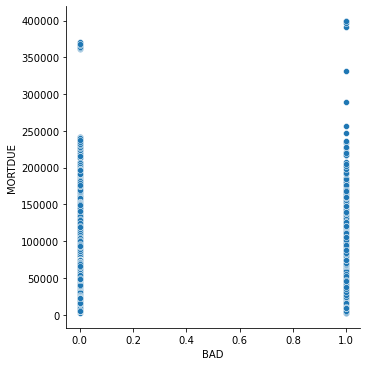

In [12]:
sns.relplot(x='BAD', y='MORTDUE', data=data)

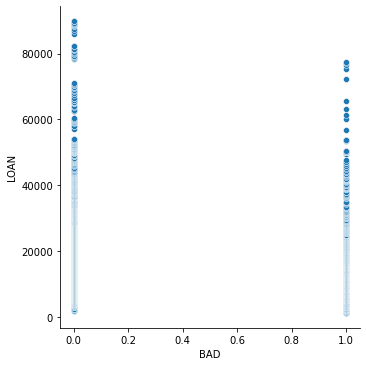

In [13]:
sns.relplot(x='BAD', y='LOAN', data=data)

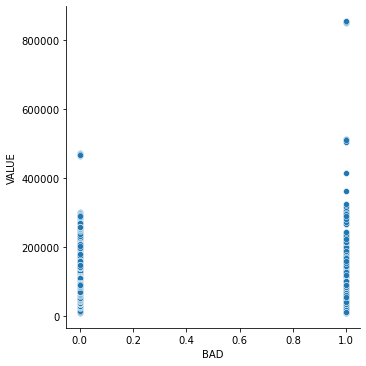

In [14]:
sns.relplot(x='BAD', y='VALUE', data=data)

# Segregating data into training and test sets

In [15]:
train = data.drop(['BAD','REASON','JOB'], axis=1)   # not required for training
test = data['BAD']                                  # to be predicted

In [16]:
train.head(10)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,NewReasonColumn,NewJobColumn
0,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,1,6
1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,1,6
2,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,1,6
3,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,3,6
4,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,1,1
5,1700,30548.0000,40320.000000,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614,1,6
6,1800,48649.0000,57037.000000,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915,1,6
7,1800,28502.0000,43034.000000,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894,1,6
8,2000,32700.0000,46740.000000,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915,1,6
9,2000,73760.8172,62250.000000,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915,1,2


In [17]:
test.head(10)

0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    1
Name: BAD, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.30, random_state=2)  # 30% Testing 

# Applying Linear Regression

In [20]:
#np.argwhere(np.isnan(X_train))

In [21]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
predict = regression.predict(X_test)
predict

array([ 0.00847056, -0.03394829,  0.25481338, ...,  0.17030823,
        0.11979347,  0.24653362])

In [23]:
accuracy = regression.score(X_test, y_test)
accuracy

0.18213163270765043

# Applying Gaussian Naive Bayes

In [24]:
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes.fit(X_train, y_train)

GaussianNB()

In [25]:
predict = gaussian_naive_bayes.predict(X_train)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
accuracy = gaussian_naive_bayes.score(X_test, y_test)
accuracy

0.8131991051454138

In [27]:
# In this case, Gaussian Naive Bayes gave more accuracy than Linear Regression